In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode=`nearest`)'

rotation_range: 이미지 회전 범위 (degrees)<br>

width_shift, height_shift: 그림을 수평 또는 수직으로 랜덤하게 평행 이동시키는 범위 (원본 가로, 세로 길이에 대한 비율 값)<br>

rescale: 원본 영상은 0-255의 RGB 계수로 구성되는데, 이 같은 입력값은 모델을 효과적으로 학습시키기에 너무 높습니다 (통상적인 learning rate를 사용할 경우). 그래서 이를 1/255로 스케일링하여 0-1 범위로 변환시켜줍니다. 이는 다른 전처리 과정에 앞서 가장 먼저 적용됩니다.<br>

shear_range: 임의 전단 변환 (shearing transformation) 범위<br>

zoom_range: 임의 확대/축소 범위<br>

horizontal_flip: True로 설정할 경우, 50% 확률로 이미지를 수평으로 뒤집습니다. 원본 이미지에 수평 비대칭성이 없을 때 효과적입니다. 즉, 뒤집어도 자연스러울 때 사용하면 좋습니다.<br>

fill_mode 이미지를 회전, 이동하거나 축소할 때 생기는 공간을 채우는 방식

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# 모델 학습에 용이한 데이터 불러오기
train_data_dir = '/content/drive/MyDrive/dataCreater/대학부 데이터셋'

np.random.seed(15)

#제너레이터로 이미지 사이즈가 고정되도록 함
train_datagen = ImageDataGenerator(rescale = 1. /255)
#opencv로 진행해볼것
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size =(300, 300),
    batch_size = 100, # 25503개로 수정해봐야함
    class_mode = 'categorical',
)

x,y = train_generator.next()

img_dataFrame = pd.DataFrame({'이미지 픽셀값':list(x), '타깃값':list(y)})
img_dataFrame.head(100)


#print('X_train shape: ', x[0].shape)
#print(x[0])
#plt.imshow(x[0])
#plt.show()

Found 25503 images belonging to 20 classes.


이미지 픽셀값  \
0   [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
1   [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
2   [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
3   [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
4   [[[0.42352945, 0.45882356, 0.2901961], [0.4156...   
..                                                ...   
95  [[[0.14117648, 0.18431373, 0.050980397], [0.30...   
96  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
97  [[[1.0, 1.0, 0.9921569], [1.0, 1.0, 0.9921569]...   
98  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
99  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   

                                                  타깃값  
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...  
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...  
3   [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
..                                                ...  
95  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
96  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...  
97  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
98  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
99  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...  

[100 rows x 2 columns]

# 객체 1개짜리만 뽑아내기
일러스트 이미지는 객체 1개만 그림(딱 원하는 label하나만)<br>
실제 사진은 객체가 여러개 잡힐 가능성이 높음(따라서 객체가 2개이상이면 데이터프레임에서 제거)

In [ ]:
pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox

im = np.array(img_dataFrame.iloc[0,0])


# object detection (물체 검출)
bbox, label, conf = cv.detect_common_objects(im)

print(bbox, label, conf)

[] [] []


In [ ]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
from PIL import Image
'''
# Load Yolo
#내 디렉토리에서 다운받아 사용해야하는데 사용가능한가??
#net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
net = cv2.dnn.readNetFromDarknet("yolov3-coco/yolov3.cfg", "yolov3-coco/yolov3.weights")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))
'''

img_num = []
b = []
l=[]
c=[]


for i in img_dataFrame['이미지 픽셀값']:
  '''
  img = np.array(i)
  height, width, channels = img.shape
  # Detecting objects
  blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
  net.setInput(blob)
  outs = net.forward(output_layers)
  obj.append(outs)

  img_dataFrame['object'] = obj
  '''
  bbox, label, conf = cv.detect_common_objects(np.array(i))
  b.append(bbox)
  l.append(label)
  c.append(conf)

img_dataFrame['bbox'] = b
img_dataFrame['label'] = l
img_dataFrame['conf'] = c
'''
#for i in range(len(x)):
#object detection (물체 검출)
#bbox, label, conf = cv.detect_common_objects(x[0])

#rint(bbox, label, conf)

#im = draw_bbox(im, bbox, label, conf) 


#cv2.imwrite('result.jpg', im) # 이미지 쓰기
'''

"\n#for i in range(len(x)):\n#object detection (물체 검출)\n#bbox, label, conf = cv.detect_common_objects(x[0])\n\n#rint(bbox, label, conf)\n\n#im = draw_bbox(im, bbox, label, conf) \n\n\n#cv2.imwrite('result.jpg', im) # 이미지 쓰기\n"

In [ ]:
img_dataFrame.head(100)

이미지 픽셀값  \
0   [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
1   [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
2   [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
3   [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
4   [[[0.42352945, 0.45882356, 0.2901961], [0.4156...   
..                                                ...   
95  [[[0.14117648, 0.18431373, 0.050980397], [0.30...   
96  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
97  [[[1.0, 1.0, 0.9921569], [1.0, 1.0, 0.9921569]...   
98  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
99  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   

                                                  타깃값 bbox label conf  
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...   []    []   []  
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   []    []   []  
2   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...   []    []   []  
3   [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   []    []   []  
4   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   []    []   []  
..                                                ...  ...   ...  ...  
95  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   []    []   []  
96  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...   []    []   []  
97  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   []    []   []  
98  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   []    []   []  
99  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...   []    []   []  

[100 rows x 5 columns]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


# 중복 이미지 분류하기

CORREL    	img1:   1.00	img2:   0.99	img3:   0.99	img4:   0.99	img5:   0.10	img6:   0.99	img7:   0.49	img8:   0.99	img9:   0.99	img10:   0.99	img11:   0.99	img12:   0.99	img13:   0.99	img14:   0.99	img15:   0.99	img16:   0.99	img17:   0.99	img18:   0.99	img19:   0.99	img20:   0.99	img21:   0.99	img22:   0.99	img23:   0.99	img24:   0.99	img25:   0.99	img26:   0.99	img27:   0.99	img28:   0.99	img29:   0.99	img30:   0.99	img31:   0.99	img32:   0.99	img33:   0.99	img34:   0.99	img35:   0.99	img36:   0.97	img37:   0.99	img38:   0.99	img39:   0.99	img40:   0.99	img41:   0.99	img42:   0.99	img43:   0.99	img44:   0.99	img45:   0.99	img46:   0.99	img47:   0.47	img48:   0.99	img49:   0.99	img50:   0.99	img51:   0.99	img52:   0.99	img53:   0.95	img54:   0.99	img55:   0.99	img56:   0.99	img57:   0.04	img58:   0.99	img59:   0.99	img60:   0.99	img61:   0.99	img62:   0.99	img63:   0.99	img64:   0.99	img65:   0.99	img66:   0.99	img67:   0.99	img68:   0.99	img69:   0.99	img70:   0.99	img71:   0.99	img7

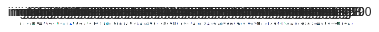

In [ ]:
import cv2   # OpenCV

def check_dupli(imgs):


imgs = [np.array(i) for i in img_dataFrame['이미지 픽셀값']]
hists = []
for i, img in enumerate(imgs) :
    #---① 각 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #---② H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    #---③ 0~1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)

query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR, 
           'INTERSECT':cv2.HISTCMP_INTERSECT,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우 
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()

+ 이미지 하나 불러와보기

In [ ]:
import cv2

img = cv2.imread('/content/drive/MyDrive/dataCreater/대학부 데이터셋/L2_10/aamhfbsxjoqkqsxnnpoy.jpg')
height, width = img.shape[:2]

print(width)
print(height)

1200
1200


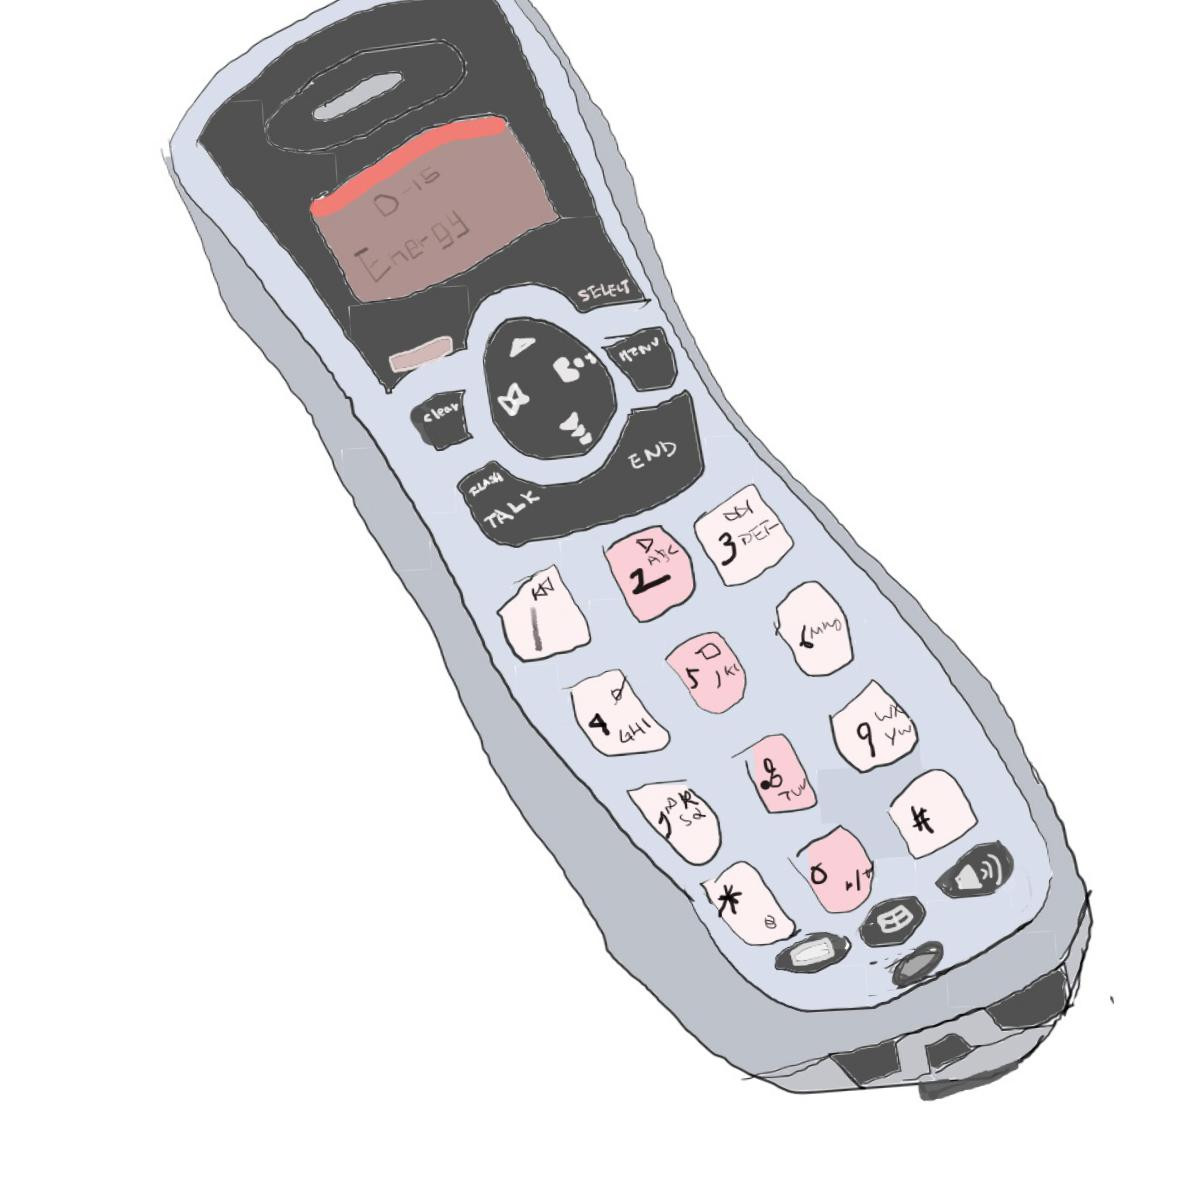

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# 새로운 방법

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import pandas as pd

#시각화 처리
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
img_dataFrame = pd.DataFrame(columns=['이미지 주소', '이미지 분류'], index = range(25503))
img_dataFrame.shape

(25503, 2)

In [ ]:
import os
 
img_path_list = []
possible_img_extension = ['.jpg', '.jpeg', '.JPG', '.bmp', '.png'] # 이미지 확장자들

np.random.seed(15)

directory_path = '/content/drive/MyDrive/dataCreater/대학부 데이터셋'
directory_list = os.listdir(directory_path)
print(directory_list)


dl=[]

for i in  directory_list:
  dl.append('/content/drive/MyDrive/dataCreater/대학부 데이터셋/'+i)


for dlf in dl:
  for (root, dirs, files) in os.walk(dlf):
    if len(files) > 0:
      for file_name in files:
        if os.path.splitext(file_name)[1] in possible_img_extension:
          img_path = root + '/' + file_name
                
          # 경로에서 \를 모두 /로 바꿔줘야함
          img_path = img_path.replace('\\', '/') # \는 \\로 나타내야함         
          img_path_list.append(img_path)
                             
#print(img_path_list)
img_dataFrame['이미지 주소'] = img_path_list
img_dataFrame.shape
#img_dataFrame.head(50)

['L2_10', 'L2_3', 'L2_15', 'L2_12', 'L2_24', 'L2_25', 'L2_30', 'L2_20', 'L2_27', 'L2_21', 'L2_39', 'L2_40', 'L2_41', 'L2_45', 'L2_34', 'L2_52', 'L2_33', 'L2_46', 'L2_50', 'L2_44']


(25503, 2)

In [ ]:
#opencv 사용할것
import PIL.Image as pilimg
import numpy as np
from PIL import Image
import cv2
 
pix=[]
'''
i1 = Image.open(img_dataFrame.iloc[0, 0])
pix.append(np.array(i1))
print(pix)
'''

for img in img_dataFrame.iloc[:200, 0]:
  i = Image.open(img)
  pix.append(np.array(i))

'''
# Read image
for img in img_dataFrame['이미지 주소']:
  #pix.append(cv2.imread(img))
  i = Image.open(img)
  pix.append(np.array(img))
'''

"\n# Read image\nfor img in img_dataFrame['이미지 주소']:\n  #pix.append(cv2.imread(img))\n  i = Image.open(img)\n  pix.append(np.array(img))\n"

In [ ]:
num_dataFrame = pd.DataFrame(columns=['이미지 배열'], index = range(200))
num_dataFrame['이미지 배열'] = pix

# OPENCV 사용해보기
import cv2

**메서드 imread()**
cv2.imread(filename, flag) : 이미지를 읽어 Numpy 객체로 만드는 함수
flag


*   IMREAD_COLOR : 이미지를 COLOR로 읽고 투명한 부분 무시
*   IMREAD_GRAYSCALE : 이미지를 Grayscale로 읽기
*   IMREAD_UNCHAGED : 이미지를 Color로 읽고, 투명한 부분도 읽기(Alpha)

반환 값 : Numpy 객체(행, 열, 생상 : 기본 rgb)

**메서드 imshow(title, image)**
cv.imshow(title, image) : 특정한 이미지 출력

코랩에서는 아래와 같이 사용가능
from google.colab.patches import cv2_imshow
cv2_imshow(img)

**메서드 imwrite**
cv.imwrite(file_name, image) : 이미지 저장하기

**이미지의 행렬 표현**
한 픽셀 당 rgb로 표현<br>

**메서드 cvtColor()**
cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
+ 처음 cv2로 이미지를 불러오면 픽셀의 정보가 BGR순
+ matplotlib같은 라이브러리는 RGB순으로 받아와야 하기에 BGR에서 RGB로 픽셀정보의 순서를 변경


**메서드 resize()**
cv2.resize(image, dsize, fx, fy, interpolation) : 이미지 크기 조절

- dsize : Manual size(None)
- fx : 가로 비율
- fy : 세로 비율
- interpolation : 보간법
  + INTER_CUBIC : 사이즈를 크게할 때
  + INTER_AREA : 사이즈를 작게 할 때


**메서드 warpAffine()**
cv2.warpAffine(image, M, dsize) : 위치 옮기기
+ M : 변환행렬
+ dsize : Manual Size

**메서드 add()**
cv2.add(image1, image2) : Saturation 연산을 수행(0보다 작으면 0, 255보다 크면 255로 표현)


# OpenCV 임계점 처리하기
## 이미지의 기본 이진화
**메서드 threshold()**
cv2.threshold(image, thresh, max_value, type) : 임계값을 기준으로 흑/백으로 분류하는 함수
+ image: 처리할 Gray Scale 이미지
+ thresh: 임계값(전체 픽셀에 적용) => 어떤 한계치를 초과할 경우 조치를 취하겠다!
+ max_value: 임계값을 넘었을때 적용할 값
+ type: 임계점을 처리하는 방식
  + THRESH_BINARY : 임계값 보다 크면 max_value, 작으면 0
  + THRESH_BINARY_INV : 임계값보다 작으면 max_value, 크면 0
  + THRESH_TRUNC : 임계값보다 크면 임계값, 작으면 그대로
  + THRESH_TOZERO : 임계값보다 크면 그대로, 작으면 0
  + THRESH_TOZERO_INV : 임계값보다 크면 0. 작으면 그대로